# **CDD - CCR5 : Comparing Regressors Part 05**

khalid El Akri

['Chem Code Professor' YouTube channel](http://youtube.com/@chemcodeprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the Bindingdb bioactivity data.

In **Part 05**, we will be comparing several Machine Learning algorithms for build regression models of CCR5 inhibitors.

## **1. Import libraries**

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**

In [ ]:
df = pd.read_csv('CCR5_bioa_data_preprocessed_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30
2942,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30
2943,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30
2944,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.30


In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examin X dimension
X.shape

(2946, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2946, 153)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [05:44<00:00,  8.20s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [05:27<00:00,  7.80s/it]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.89,0.90,0.47,3.57
DecisionTreeRegressor,0.89,0.90,0.47,0.15
ExtraTreeRegressor,0.89,0.90,0.47,0.17
ExtraTreesRegressor,0.89,0.90,0.47,3.91
XGBRegressor,0.88,0.89,0.49,1.69
RandomForestRegressor,0.87,0.88,0.51,2.77
BaggingRegressor,0.86,0.87,0.53,0.33
MLPRegressor,0.85,0.86,0.55,6.61
HistGradientBoostingRegressor,0.81,0.82,0.62,1.17


In [10]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.52,0.64,0.88,1.91
RandomForestRegressor,0.52,0.64,0.88,3.39
XGBRegressor,0.51,0.64,0.89,1.64
BaggingRegressor,0.50,0.63,0.90,0.31
LGBMRegressor,0.49,0.62,0.90,0.24
MLPRegressor,0.49,0.62,0.90,6.67
DecisionTreeRegressor,0.47,0.61,0.92,0.12
NuSVR,0.47,0.61,0.92,0.74
ExtraTreesRegressor,0.46,0.60,0.93,3.60


## **5. Data visualization of model performance**

[(0.0, 1.0)]

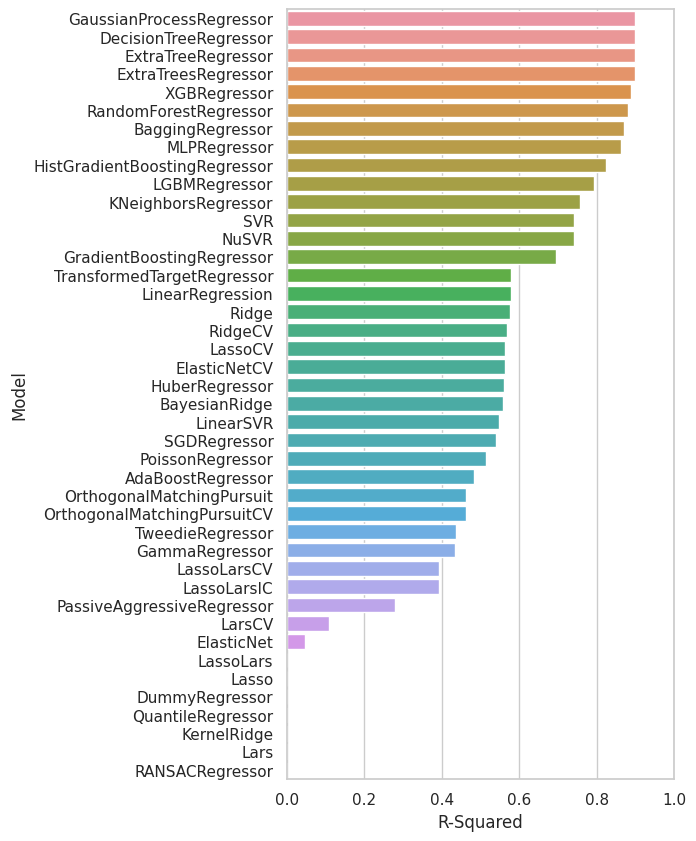

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

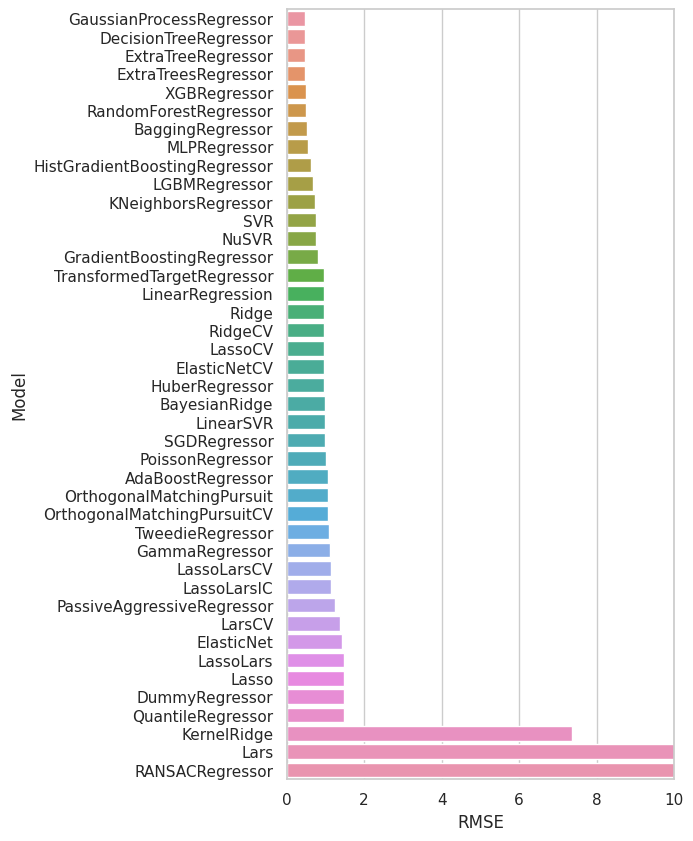

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

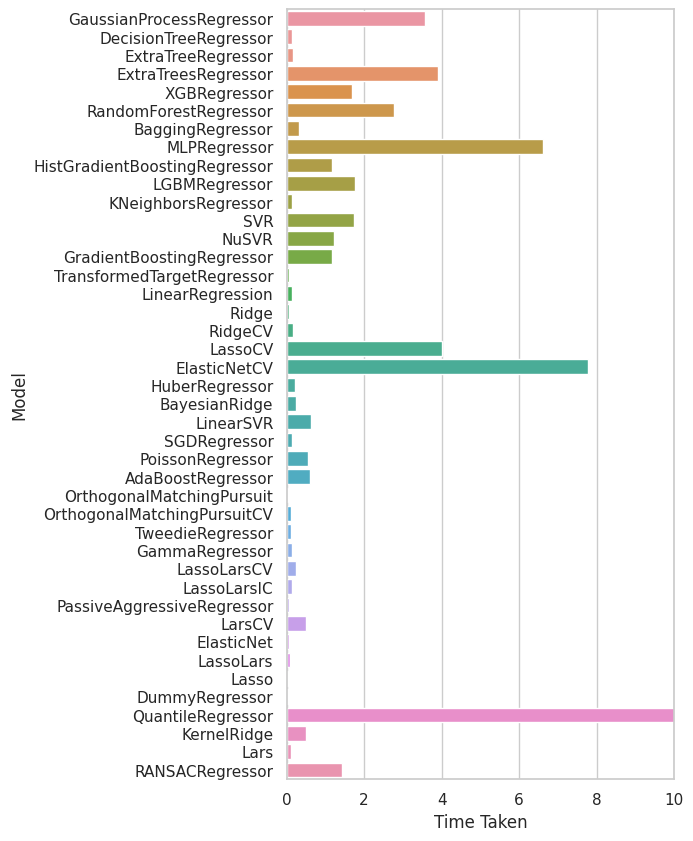

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))